# A (very short) introduction to Python for Scientific Computations

This notebook will go through the basics of Python and show some examples. In addition there will be some exercises for you to fill out, to get some experience with each presented topic. This introduction is based on an introduction written by Hans Petter Langtangen and Leif Rune Hellevik, which you can find on [github](https://github.com/hplgit/bumpy).

We will cover
* variables of different types
* while loops and for loops
* defining functions
* if-tests
* plotting

The aim of this notebook is to give the reader a view of the basics. The rest of the summer school will use Python for a wide variety of examples and exercises, and you will be able to learn more about Python and how to use it effectively.

As a recurring example, we will use the mathematical formula
$$s(t) = v_0 t + \frac{1}{2}at^2,$$
Where $s$ is the distance traveled by an object after time $t$ with a constant acceleration $a$, starting with an initial velocity $v_0$.

#### A short note on Jupyter Notebook

This document, and many others during the summer school, is written in Jupyter notebooks. This is a tool that allows for combining text, figures and code. The codes is runable. If you want to run a code snippet, select the code by clicking it, and then either click the `Run` command in the toolbar at the top, or use the keyboard shortcut `Ctrl + Enter` or `Shift + Enter`. When you run a code, the output will appear below the cell. If you make a change to a cell that has already been run you can rerun the cell, and the new output will replace the old one.

### Variables and Types

#### Assigning Variables

The first thing we will cover is how to define variables in Python. As in most programmering languages, `=` is the assignment operator. In Python you do not have to declare the type of the variable, this is decided by context.

###### Example
Let us say we want to compute our distance formula for $t = 0.5$, $v_0=2$ and $a=0.2$.


In [1]:
t = 0.5
v0 = 2
a = 0.2
s = v0*t + 0.5*a*t**2

Here we first assign the three variables `t`, `v0` and `a`. Then we assign the variable `s` based on our other variables by doing some arithmetic. An assignment on the form of the final line is interpreted as follows:
* Evaluate the right-hand side of the `=` symbol, this results in an *object*
* The left hand side is a name for that object
In this case, the result of the computation is a number, and `s` becomes a name for that number. But how do we check what `s` is? We use the `print`-statement.

In [2]:
print(s)

1.025


Note that `s` is a name pointing at a number object containing 1.025. If we now for example reassign `t`, `s` will _not_ change.

If you wish to have more control over how you print, you can use print formatting. You can see this link for a [comprehensive introduction](https://docs.python.org/3/tutorial/inputoutput.html). But for now we just give an example:

In [3]:
print("After {:.2f} seconds, the object has traveled {:.3f} meters".format(t, s))

After 0.50 seconds, the object has traveled 1.025 meters


Here we define a text string to be written out by using `"`, inside the text string we define replacement fields by writing `{}` and then we use `.format` to fill these in with given values. Inside the replacement fields we write `:.2f` and `:.3f` to write precisely 2 and 3 decimals respectively. (The `f` stands for *float*)

#### Exercise 1: Your turn

First define the radius of a football as the variable `R`, then compute the volume of the football as the variable `V`, then finally print out the volume with a single decimal. (Hint: You need to either define `pi`, or import it by writing `from math import pi`.)

In [ ]:
#Fill in your code here

### Variable Types

In our assignment earlier, we defined four variables, all numbers. However, their datatypes are slightly different. The variables `t`, `a` and `s` were assigned decimal numbers, and therefore became `float` objects, while `v0` is set to an integer number, and became an `integer` object. You can check the type of a variables with the `type` command

In [4]:
print(type(t))
print(type(v0))
print(type(a))
print(type(s))

<class 'float'>
<class 'int'>
<class 'float'>
<class 'float'>


## While Loop

Let's say we want to not only compute how far the object has traveled after a given amount of time, but calculate it at several times. This means we want to repeat our calculation many times, and for this, a loop is good. In Python we have two types of loops, the first we will cover is the *while* loop, the other is a *for* loop.

The syntax of a while loop in Python is as follows:

```Python
while <condition>:
    <code block to be repeated>
    <code block to be repeated>
    <code block to be repeated>
```
Observe the colon at the end of the `while` line and the indentation of the following three lines. The set of indented statements are repeated as long as the expression or variable `condition` evaluates to `True`. 

In [5]:
# Parameters
v0 = 2
a = 0.2

# Time Parameters
dt = 0.1 # Increment in time per step
t = 0    # Start value in time
T = 2    # Final time

# Loop
while t <= T:
    s = v0*t + 0.5*a*t**2
    print("{:2.1f}  {:4.2f}".format(t, s))
    t = t + dt

0.0  0.00
0.1  0.20
0.2  0.40
0.3  0.61
0.4  0.82
0.5  1.02
0.6  1.24
0.7  1.45
0.8  1.66
0.9  1.88
1.0  2.10
1.1  2.32
1.2  2.54
1.3  2.77
1.4  3.00
1.5  3.23
1.6  3.46
1.7  3.69
1.8  3.92
1.9  4.16


In this loop, the time variable `t` starts at 0, but because the condition `t < T` is evaluated to `True` the loop is repeated many times. For each iteration of the loop the time is incremented by a single `dt` untill eventually we reach our end time and the loop stops. There is however a small error in our code, which we will explain now

**Error in the code**

According to the code, the last pass in the while loop should correspond
to $t=2$, but looking at the output, we see that the last print
statement has $t=1.9$. The next test in the while condition involves
$t=2$ and the boolean condition is expected to be `2 == 2`. However,
it seems that the condition is `False` since the computations for
$t=2$ are not printed. Why do we experience this behavior?

To understand this, we need to understand that computers cannot represent decimal numbers precisely, and so while what we want `t` to be 2.0, the increments of `0.1` have not been perfectly represented on the computer, and so `t` is ever so slightly larger than 2. We can see this by printing to machine precision by using 16 decimal places

In [6]:
print("{:.16f}".format(t))

2.0000000000000004


For this reason, we should be careful when we want to test or compare floats.

#### Exercise 2: Using a while loop to calculate interest

Assume we have a savings account with an annual interest of 3.5%. If we deposit $10000 to the account at the start of year 0. How many years would you need to wait before the money in the account has doubled?

Fill in the skeleton below to answer this question.

In [ ]:
# Fill in code where it says '...'
year = 0
interest = 1.035
money = 10000

while ...:
    money *= ...
    year += ...
    
print(...)

## Lists

In the previous section we saw how we could use a loop to calculate how far the object had traveled for a set of times. These values is a collection of numbers, or objects. In Python we can store such sequences as *lists*. Lists are defined using square brackets: `[]` with the values separated by commas. For example:

In [7]:
time = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]

Lists can contain objects of any type, and a single list can contain objects of different types. 

A list consists of many *elements*. We can find the number of elements in the list, also known as the list's length, by using `len(time)`. We can access elements to read or change them using indexing: `time[0]` is the first element, `time[1]` the second and so on. Note that Python starts counting at 0.

After being created, a list can be changed. We can go in and change the value of given elements, or we can delete elements using `del time[1]` or we can add elements using `time.append(0.6)`. Appended elements go at the end of the list.

Let us see how we can use lists to store the results of our previous loop example:

In [8]:
# Parameters
v0 = 2
a = 0.2

# Time Parameters
dt = 0.1 # Increment in time per step
t = 0    # Start value in time
T = 2    # Final time

# Define empty lists
t_list = []
s_list = []

# Loop
while t <= T:
    s = v0*t + 0.5*a*t**2
    t = t + dt
    
    # Append values to lists
    t_list.append(t)
    s_list.append(s)
    
print(t_list)
print(s_list)

[0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.9999999999999999, 1.0999999999999999, 1.2, 1.3, 1.4000000000000001, 1.5000000000000002, 1.6000000000000003, 1.7000000000000004, 1.8000000000000005, 1.9000000000000006, 2.0000000000000004]
[0.0, 0.201, 0.404, 0.6090000000000001, 0.8160000000000001, 1.025, 1.236, 1.4489999999999998, 1.664, 1.8809999999999998, 2.0999999999999996, 2.3209999999999997, 2.544, 2.769, 2.9960000000000004, 3.2250000000000005, 3.456000000000001, 3.689000000000001, 3.9240000000000013, 4.161000000000001]


In this example we have only added the lists. We first define empty lists by writing `t_list = []`, and inside the loop we add the value by `.append`. Finally we print out the lists. We see that the ouput isn't very pretty. To get full control over priting we could loop over the values in the lists and use printf-syntax.

Lists come with a lot of functionality, see
[Python Tutorial](https://docs.python.org/2/tutorial/introduction.html#lists)
for more examples.


#### Exercise 3: Using a while loop to calculate interest

Use a while loop to create a list that contains all integers from 0 to 10 in order. Then modify your code so that you create a second list, this one containing the square of the integers.

In [ ]:
# Your code here...

## For loops

We have briefly covered *while*-loops, now we cover *for*-loops. Where the while-loop repeats until a condition is met, the for loop goes through a collection of objects such as a list. We say that we loop over a list, or iterate through a list.

The syntax for a for-loop in Python is as follows:

```Python
for <element> in <list>:
    <codeblock to be repeated>
    <codeblock to be repeated>
    <codeblock to be repeated>
```
Here `<list>` should be replaced by the name of our list object, and `<element>` is a name we choose, this variable will be set to each element in the list as we progress through our list.

We can for example loop through and print through the elements of our `t_list` and `s_list` variables:

In [9]:
for t in t_list:
    print("{:.1f}".format(t))

0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
1.0
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
1.9
2.0


We can loop through both at the same time using `zip`:

In [10]:
for t, s in zip(t_list, s_list):
    print("{:.1f} {:.2f}".format(t, s))

0.1 0.00
0.2 0.20
0.3 0.40
0.4 0.61
0.5 0.82
0.6 1.02
0.7 1.24
0.8 1.45
0.9 1.66
1.0 1.88
1.1 2.10
1.2 2.32
1.3 2.54
1.4 2.77
1.5 3.00
1.6 3.23
1.7 3.46
1.8 3.69
1.9 3.92
2.0 4.16


Or we could use the `range` function to loop over the indices of the list. The function `range(n)` defines the list of integers from 0 to $n-1$, so if we write `for i in range(len(t_list)):` we loop over each index in the list exactly one.

In [11]:
for i in range(len(t_list)):
    print("{:.1f} {:.2f}".format(t_list[i], s_list[i]))

0.1 0.00
0.2 0.20
0.3 0.40
0.4 0.61
0.5 0.82
0.6 1.02
0.7 1.24
0.8 1.45
0.9 1.66
1.0 1.88
1.1 2.10
1.2 2.32
1.3 2.54
1.4 2.77
1.5 3.00
1.6 3.23
1.7 3.46
1.8 3.69
1.9 3.92
2.0 4.16


We can also rewrite our program that calculated `t_list` and `s_list` to use a for-loop, rather than a while-loop:

In [12]:
# Parameters
v0 = 2
a = 0.2

# Time Parameters
dt = 0.1 # Increment in time per step
t = 0    # Start value in time
T = 2    # Final time
n = int(T/dt) # Number of time steps needed

# Define empty lists
t_list = []
s_list = []

# Loop
for i in range(n):
    s = v0*t + 0.5*a*t**2
    t = t + dt
    
    # Append values to lists
    t_list.append(t)
    s_list.append(s)
    

for i in range(n):
    print("{:.1f} {:.2f}".format(t_list[i], s_list[i]))

0.1 0.00
0.2 0.20
0.3 0.40
0.4 0.61
0.5 0.82
0.6 1.02
0.7 1.24
0.8 1.45
0.9 1.66
1.0 1.88
1.1 2.10
1.2 2.32
1.3 2.54
1.4 2.77
1.5 3.00
1.6 3.23
1.7 3.46
1.8 3.69
1.9 3.92
2.0 4.16


Here we first compute the number of steps we need to do in our for-loop as the variable `n`. Note that we write `int(T/dt)`, as we need the number of steps taken to be an integer, and not a float object (otherwhise the `range(n)` statement would crash our program, as `range` must take an integer in.

#### Exercise 4: Sum of an arithmetic series

Use a for-loop and the `range`-function to find the sum of all integers from 1 to 1000. Use the arithmetic sum formula $s = n(n+1)/2$ to check your answer.

In [ ]:
# Fill in code for ...
total = 0
for i in range(...):
    total += ...
    
print(...)

## Plotting

One use for lists is plotting. Basic Python does not have access to plotting, and so we need to import this functionality, we do this by writing

In [13]:
import matplotlib.pyplot as plt

We can now use `plt.` to access plotting functionality. The first thing we can do is plot our `t_list` and `s_list` against each other:

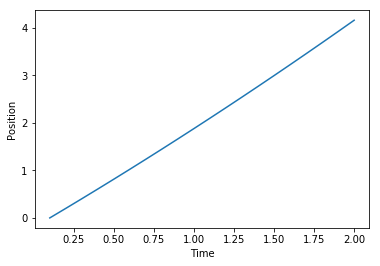

In [14]:
plt.plot(t_list, s_list)
plt.xlabel('Time')
plt.ylabel('Position')
plt.show()

This curve is not all that exciting, as it is nearly just a straight line. Let us instead plot a sine curve. To do this we will use some functionality from the *numpy* package (numerical python).

In [15]:
import numpy as np

We can now define values along the `x`-axis using `linspace(min, max, points)`. This function, similar to matlab, gives a number of points evenly spaced between the two endpoints.

In [16]:
# We want to plot two full periods (in radians)
x = np.linspace(0, 4*np.pi, 11)

We can now define our $y$-points using a for-loop, as we have seen earlier. However, `np.linspace` returns an array, which is well suited for calculating all the $y$-values simultaneously as a *vectorized* operation.

In [17]:
y = np.sin(x)

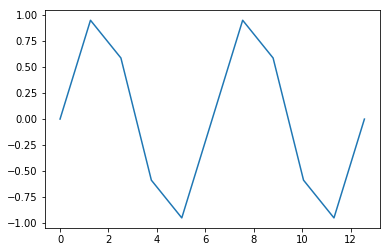

In [18]:
plt.plot(x, y)
plt.show()

Our curve looks very jagged because we only use 11 points. We can see this more easily by adding a line formatting that shows the datapoints

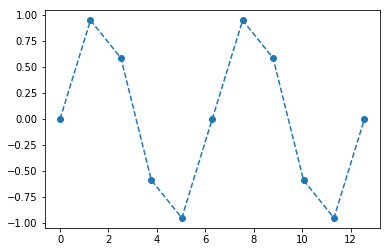

In [19]:
plt.plot(x, y, 'o--')
plt.show()

Adding more points is easy, just tell `np.linspace` to make more.

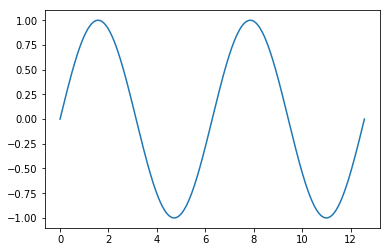

In [21]:
x = np.linspace(0, 4*np.pi, 1001)
y = np.sin(x)

plt.plot(x, y)
plt.show()

Numpy also has other common mathematical operations available in vectorized versions, including `log()`, `exp()` and `sqrt()`. Normal arithmetic operations also works well with arrays

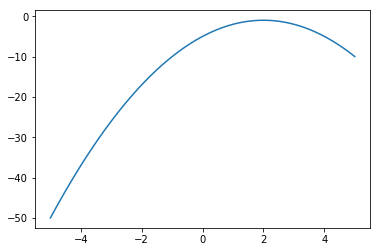

In [22]:
x = np.linspace(-5, 5, 1001)
y = -x**2 + 4*x - 5

plt.plot(x, y)
plt.show()

#### Exercise 5: Plotting a damped sine wave

Make a program that plots the function $g(y) = e^{-y}\sin(4y)$ for $y\in[0, 4]$.

#### Exercise 6: Plotting a circle

Use `np.linspace` to define $\theta \in [0, 2\pi]$, and then let $x = \cos(\theta)$ and $y = \sin(\theta)$. Plotting $(x, y)$ should now give a circle. Use `plt.axis('equal)` between your `plot` and `show` statements to make the dimensions of the $x$ and $y$ equal.

## Defining Functions

In Python, you can easily define your own functions. Let us for example define our recurring example formula:

In [23]:
def s(t, v0, a):
    return v0*t + 0.5*a*t**2

Note that:
 * functions start with the keyword `def`
 * statements belonging to the function must be indented
 * function input is represented by arguments
   (separated by comma if more than one)
 * function output is returned to the calling code with the keyword `return`
 * A function can return 0, 1, or several values (separated by comma if more than one)
 
In this function, `v0` and `a` are taken as input in a similar way to `t`. Meaning we must supply them each time we call the formula:

In [24]:
s(5, 2.0, 0.2)

12.5

If we think of $t$ as the variable, and $v_0$ and $a$ as parameters, this might not be what we want. We can define a function that can only take `t` as follows:

In [25]:
def s(t, v0=2.0, a=0.2):
    return v0*t + 0.5*a*t**2

In this example, `t` is a normal argument, that must be given in. While `v0` and `a` are *keyword*-arguments that are optional. We can now call with just $t$, or give $v_0$ and $a$ in addition. If we neglect to send in the parameters, they default to the values given when defining the function:

In [26]:
print(s(2))
print(s(2, v0=5.0))

4.4
10.4


We could also have defined our function as `def s(v):`, but in this case `v0` and `a` would need to be defined as *global variables* or else they would have been undefined, giving us a `NameError`.

Using our newly defined function, and arrays, we can now easily calculate and plot the position of the object over time:

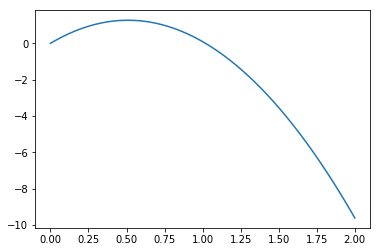

In [27]:
t = np.linspace(0, 2, 1001)
y = s(t, v0=5.0, a=-9.81)

plt.plot(t, y)
plt.show()

#### Exercise 7: Defining a Pythagoras function

Pythagoras' claimed that $a^2 + b^2 = c^2$. Define a function called `hypothenus` that finds the length of the hypothenus given the length of the two catheti.

In [ ]:
# Fill in code for "..."
def hypothenus(...):
    return ...

## If-tests

We won't say much about if-tests, they are similar to while-loops, in that they check a condition, however, they only do so a single time. The syntax is:
```Python
if condition1:
    <statements when condition1 is True>
elif condition2:
    <statements when condition1 is False and condition2 is True>
elif condition3:
    <statements when condition1 and conditon 2 are False
     and condition3 is True>
else:
    <statements when condition1/2/3 all are False>
```
The `elif` statement in Python is an abbrevation of `else if`. Note that an if-test does not necessarily need to have a corresponding elif or else block. Let us show a simple example of this:

In [ ]:
def divide(a, b):
    if b == 0:
        print("I can't divide by 0, silly.")
    else:
        return a/b

## Dictionaries

Dictionaries in Python are a collection of objects, much like a list. However, unlike a list, a dictionary consists of key-value pairs, where the key is a text spring specifying the element. Also unlike a list, a dictionary is normally not an ordered collection (though ordered dictionaries do exist if you need them).

For a model with many parameters for example, we could have all our parameters stored in a dictionary, where the keys would be the name of the parameters.


In [ ]:
param = {"v0": 5.0,
         "a": -9.81}